<a href="https://colab.research.google.com/github/yash2046/2216101_bootcamp_ml-concepts/blob/main/linear_bacteria_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#creating a Dataframe
import pandas as pd

#creating an empty Dataframe
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [3]:
#initialize list elements
data=[0.2,0.4,0.6,0.8]
df=pd.DataFrame(data,columns=['Bacteria_size'])
df['Max_Growth']=[3.4,3.8,4.2,4.6]
df

,Bacteria_size,Max_Growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [5]:
#splitting the data
x_train = df.iloc[:3,:-1]
y_train = df.iloc[:3,-1:]
x_test  =df.iloc[3:,:-1]
y_test  =df.iloc[3:,-1:]

In [6]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [7]:
import sympy as sym
from sympy import *

In [8]:
#step1 :initialize model parameters
mi=1
ci=-1
n=0.001 #learning rate -small
epochs=200

iter=1
ns=len(x_train)
print(ns)
y=1
m=1
x=1
c=1
#step 2 :start iteration
for iter in range(1,epochs+1):
  print("ITERATION:{}".format(iter))
  print("++++++++++++++++++++++++++++++++++")
  #step 3 track samples
  for sample in range(0,ns):
    xa=x_train['Bacteria_size'][sample]#0.2
    ya=y_train['Max_Growth'][sample] #3.4
    print("--->sample {}".format(sample+1)+"x={}".format(xa)+"y={}".format(ya))
    
    #step 4:calculate the Gradient
    E = (0.5)*(y-m*x-c)**2 #error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')

    deltaE_m=sym.diff(E,m)
    deltaE_c=sym.diff(E,c)

    #substituting values
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    deltaE_c=deltaE_m.subs(m,mi)
    deltaE_c=deltaE_m.subs(c,ci)
    deltaE_c=deltaE_m.subs(x,xa)
    deltaE_c=deltaE_m.subs(y,ya)

    print("Obtained gradient wrto m and c:")
    print('deltaE_m:',deltaE_m)
    print('deltaE_c:',deltaE_c)

    #step5:calculate the step length -change
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step 6: updating the model parameters
    mi+=del_m
    ci+=del_c
    print("m:  {}".format(mi)+"c:{}".format(ci))

print("--------------------------------------------------")
print("optimal values")
print('m={}'.format(mi))
print('c={}'.format(ci))

3
ITERATION:1
++++++++++++++++++++++++++++++++++
--->sample 1x=0.2y=3.4
Obtained gradient wrto m and c:
deltaE_m: 0
deltaE_c: 0
m:  1c:-1
--->sample 2x=0.4y=3.8
Obtained gradient wrto m and c:
deltaE_m: -1.76000000000000
deltaE_c: -1.76000000000000
m:  1.00176000000000c:-0.998240000000000
--->sample 3x=0.6y=4.2
Obtained gradient wrto m and c:
deltaE_m: -2.75831040000000
deltaE_c: -2.75831040000000
m:  1.00451831040000c:-0.995481689600000
ITERATION:2
++++++++++++++++++++++++++++++++++
--->sample 1x=0.2y=3.4
Obtained gradient wrto m and c:
deltaE_m: -0.838915605504000
deltaE_c: -0.838915605504000
m:  1.00535722600550c:-0.994642773994496
--->sample 2x=0.4y=3.8
Obtained gradient wrto m and c:
deltaE_m: -1.75699995343692
deltaE_c: -1.75699995343692
m:  1.00711422595894c:-0.992885774041059
--->sample 3x=0.6y=4.2
Obtained gradient wrto m and c:
deltaE_m: -2.75317034307942
deltaE_c: -2.75317034307942
m:  1.00986739630202c:-0.990132603697980
ITERATION:3
++++++++++++++++++++++++++++++++++
--->sa

In [9]:
y_train

,Max_Growth
0,3.4
1,3.8
2,4.2


In [10]:
#y=1.99 -0.07
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal=mi*x_train['Bacteria_size'][i]
  y_train_pred.append(y_cal)
y_train_pred

[0.380659261062054, 0.761318522124108, 1.14197778318616]

In [11]:
y_train_list=list(y_train['Max_Growth'])
y_train_list

[3.4, 3.8, 4.2]

In [12]:
x_train_list=list(x_train['Bacteria_size'])
x_train_list

[0.2, 0.4, 0.6]

In [13]:
error=[]
for i in range(0,len(x_train)):
  err=(y_train_list[i]-y_train_pred[i])
  error.append(err)
error

[3.01934073893795, 3.03868147787589, 3.05802221681384]

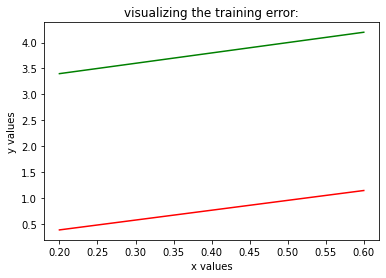

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_actual',color='green')
plt.plot(x_train_list,y_train_pred,label='y_predicted',color='red')


#Add labels and title
plt.title("visualizing the training error:")
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()